In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, log_loss
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


selected_columns = ['CustomerID', 'Start Year', 'Cleaned_Insured name', 'Policy Start Date', 'Policy End Date', 'Reg no ',
       'MANUFACTURER/Make', 'model', 'variant', 'Fuel Type', 'RTO Location ',
       'Product name ', 'Product name  2', 'biztype', 'Renewal Type', 'age',
       'Vehicle Segment', 'Number of Vehicles', 'Number of Policies',
       'Total Premium Payable (Overall)', 'Total OD Premium (Overall)',
       'Total TP Premium (Overall)', 'Total Add on Premium (Overall)',
       'Total GST (Overall)', 'Average Discount (Overall)',
       'Average NCB % Previous Year (Overall)', 'Number of Claims',
       'Number of Declines', 'New Branch Name  2', 'Policy Status', 'Not Renewed', 
       'Renewed','Open', 'Renewal Rate', 'Churn Label', 'New Customer', 'Customer Tenure ']

data = pd.read_excel('D:\Liberty\Actual data (South).xlsx')
data = data[selected_columns]

# Remove rows where 'Status' contains 'Open'
data = data[~data['Policy Status'].str.contains('Open', case=False, na=False)]

data = data[data['Policy Status'].str.contains('Renewed|Not Renewed', case=False, na=False)]

data['Churn Label'] = data['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna('missing')
    else:
        data[column] = data[column].fillna(0)

date_columns = ['Policy Start Date', 'Policy End Date']

for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Extract year, month, and day as separate features for all date columns
new_date_cols = {}
for col in date_columns:
    new_date_cols[f'{col}_YEAR'] = data[col].dt.year
    new_date_cols[f'{col}_MONTH'] = data[col].dt.month
    new_date_cols[f'{col}_DAY'] = data[col].dt.day

data = pd.concat([data, pd.DataFrame(new_date_cols)], axis=1)

most_recent_year = data['Policy Start Date_YEAR'].max()

test_data = data[(data['Policy Start Date_YEAR'] == most_recent_year) & 
                 (data['Policy Start Date_MONTH'] >= 6)]

train_data = data[~((data['Policy Start Date_YEAR'] == most_recent_year) & 
                    (data['Policy Start Date_MONTH'] >= 6))]

data = data.drop(columns=date_columns)

leaking_features = [
    'Not Renewed', 'Renewed','Open', 'Renewal Rate', 'Policy Status'
]

features = [col for col in data.columns if col not in leaking_features + ['Churn Label']]

X_train = train_data[features]
y_train = train_data['Churn Label']

X_test = test_data[features]
y_test = test_data['Churn Label']

<>:21: SyntaxWarning: invalid escape sequence '\L'
<>:21: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Admin\AppData\Local\Temp\ipykernel_4044\943238079.py:21: SyntaxWarning: invalid escape sequence '\L'
  data = pd.read_excel('D:\Liberty\Actual data (South).xlsx')


In [2]:
# Group by year and status to count occurrences in the training data
train_status_yearwise = train_data.groupby(['Policy Start Date_YEAR', 'Churn Label']).size().reset_index(name='Count')

# Group by year and status to count occurrences in the testing data
test_status_yearwise = test_data.groupby(['Policy Start Date_YEAR', 'Churn Label']).size().reset_index(name='Count')

# Print the results
print("Year-wise Status Counts in Training Data:")
print(train_status_yearwise)

print("\nYear-wise Status Counts in Testing Data:")
print(test_status_yearwise)

# Count the occurrences of 0 and 1 in the 'Status' column for train and test data
train_status_count = y_train.value_counts()
test_status_count = y_test.value_counts()

# Print the results
print("Training Data Status Counts:")
print(train_status_count)

print("\nTesting Data Status Counts:")
print(test_status_count)

Year-wise Status Counts in Training Data:
    Policy Start Date_YEAR  Churn Label  Count
0                     2018            0      1
1                     2019            0      2
2                     2019            1      1
3                     2020            0    114
4                     2020            1   1247
5                     2021            0    731
6                     2021            1     10
7                     2022            0  70528
8                     2022            1  85936
9                     2023            0  33159
10                    2023            1  43458

Year-wise Status Counts in Testing Data:
   Policy Start Date_YEAR  Churn Label  Count
0                    2023            0   9034
1                    2023            1  50072
Training Data Status Counts:
Churn Label
1    130652
0    104535
Name: count, dtype: int64

Testing Data Status Counts:
Churn Label
1    50072
0     9034
Name: count, dtype: int64


In [3]:
# Group by year and status to count occurrences in the training data
train_status_monthwise = train_data.groupby(['Policy Start Date_YEAR', 'Policy Start Date_MONTH', 'Churn Label']).size().reset_index(name='Count')

# Group by year and status to count occurrences in the testing data
test_status_monthwise = test_data.groupby(['Policy Start Date_YEAR', 'Policy Start Date_MONTH', 'Churn Label']).size().reset_index(name='Count')

# Print the results
print("Year-wise Status Counts in Training Data:")
print(train_status_monthwise)

print("\nYear-wise Status Counts in Testing Data:")
print(test_status_monthwise)

# Count the occurrences of 0 and 1 in the 'Status' column for train and test data
train_status_count = y_train.value_counts()
test_status_count = y_test.value_counts()

# Print the results
print("Training Data Status Counts:")
print(train_status_count)

print("\nTesting Data Status Counts:")
print(test_status_count)

Year-wise Status Counts in Training Data:
    Policy Start Date_YEAR  Policy Start Date_MONTH  Churn Label  Count
0                     2018                        8            0      1
1                     2019                        8            0      1
2                     2019                        8            1      1
3                     2019                       12            0      1
4                     2020                        1            0      7
..                     ...                      ...          ...    ...
69                    2023                        3            1  10951
70                    2023                        4            0   5796
71                    2023                        4            1   8071
72                    2023                        5            0   6806
73                    2023                        5            1   8176

[74 rows x 4 columns]

Year-wise Status Counts in Testing Data:
   Policy Start Date_YEAR  Po

In [4]:
# Apply label encoding to categorical features for both train and test sets
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        # Initialize and fit the LabelEncoder on the training data
        label_encoder = LabelEncoder()
        X_train[column] = label_encoder.fit_transform(X_train[column].astype(str))

        # Create a mapping dictionary from the LabelEncoder
        mapping_dict = {label: i for i, label in enumerate(label_encoder.classes_)}
        
        # Track the next unique integer for unseen values in the test set
        next_unique_value = [max(mapping_dict.values()) + 1]  

        # Encode the test data
        def encode_test_value(value):
            if value in mapping_dict:
                return mapping_dict[value]
            else:
                # Update the mapping_dict with a new unique value for unseen categories
                mapping_dict[value] = next_unique_value[0]
                next_unique_value[0] += 1
                return mapping_dict[value]

        # Apply the encoding to the test set
        X_test[column] = X_test[column].apply(encode_test_value)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4044\1072933455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = label_encoder.fit_transform(X_train[column].astype(str))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4044\1072933455.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = X_test[column].apply(encode_test_value)
C:\Users\Admin\AppData\Local\Temp\ipykernel_4044\1072933455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Test Accuracy: 0.7018
Test Log Loss: 0.4390
Test ROC AUC: 0.7604
Test Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.58      0.37      9034
           1       0.91      0.72      0.80     50072

    accuracy                           0.70     59106
   macro avg       0.59      0.65      0.59     59106
weighted avg       0.81      0.70      0.74     59106

Class 0 Test Accuracy: 0.5832
Class 1 Test Accuracy: 0.7231
Train Accuracy: 1.0000
Train Log Loss: 0.0685
Train ROC AUC: 1.0000
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    104535
           1       1.00      1.00      1.00    130652

    accuracy                           1.00    235187
   macro avg       1.00      1.00      1.00    235187
weighted avg       1.00      1.00      1.00    235187

Class 0 Train Accuracy: 1.0000
Class 1 Train Accuracy: 1.0000


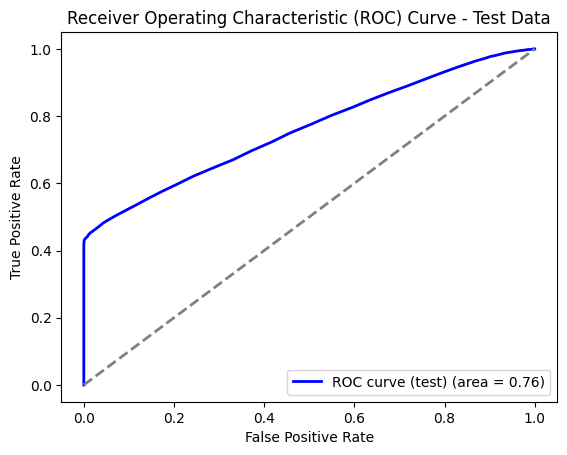

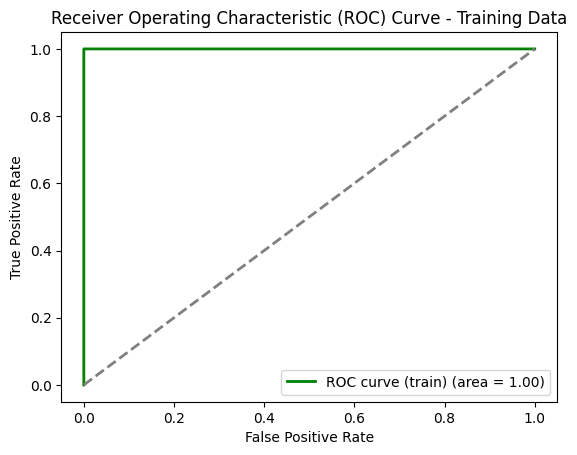

In [5]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import (
    accuracy_score,
    log_loss,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt

# Define the Bagging model with default base estimator (DecisionTreeClassifier)
model = BaggingClassifier(
    n_estimators=100,   # Number of trees in the ensemble
    random_state=42,
    n_jobs=-1,          # Use all available CPU cores
    bootstrap=True      # Use bootstrapping (sampling with replacement)
)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Log Loss: {log_loss_value:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test:.4f}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test:.4f}")

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Log Loss: {train_log_loss:.4f}")
print(f"Train ROC AUC: {train_roc_auc:.4f}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train:.4f}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train:.4f}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Define the Bagging model with reduced complexity and balanced class weights
model = BaggingClassifier(
    n_estimators=50,              # Reduce the number of trees
    max_samples=0.8,              # Use 80% of data for each base estimator
    max_features=0.8,             # Use 80% of features for each base estimator
    random_state=42,
    n_jobs=-1,
    bootstrap=True,
    class_weight='balanced'       # Handle class imbalance
)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

Test Accuracy: 0.7108077014177918
Test Log Loss: 0.47057748926555165
Test ROC AUC: 0.8100034732363082
Test Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.78      0.45      9034
           1       0.95      0.70      0.80     50072

    accuracy                           0.71     59106
   macro avg       0.63      0.74      0.63     59106
weighted avg       0.85      0.71      0.75     59106

Class 0 Test Accuracy: 0.7831525348682754
Class 1 Test Accuracy: 0.6977552324652501
Train Accuracy: 0.8731222388992589
Train Log Loss: 0.3195196151088339
Train ROC AUC: 0.9490406147113355
Train Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86    104535
           1       0.90      0.86      0.88    130652

    accuracy                           0.87    235187
   macro avg       0.87      0.87      0.87    235187
weighted avg       0.87      0.87      0.87    235187


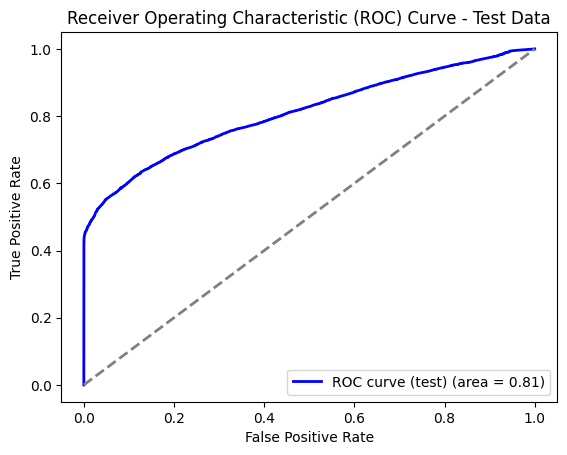

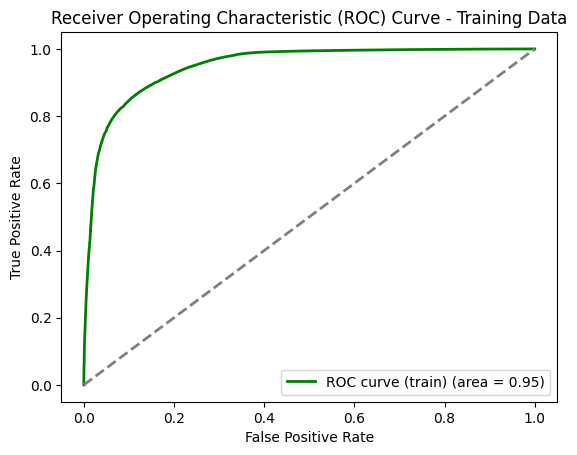

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Define the base Decision Tree model with class weights
base_model = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=6,             # Limit tree depth to prevent overfitting
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Define the Bagging model using the base model
model = BaggingClassifier(
    estimator=base_model,    # Use 'estimator' instead of 'base_estimator'
    n_estimators=50,         # Reduce the number of trees
    max_samples=0.8,         # Use 80% of data for each base estimator
    max_features=0.8,        # Use 80% of features for each base estimator
    random_state=42,
    n_jobs=-1,
    bootstrap=True
)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.41769025141271615
Test Log Loss: 0.7548342137226723
Test ROC AUC: 0.4775303107470339
Test Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.40      0.17      9034
           1       0.80      0.42      0.55     50072

    accuracy                           0.42     59106
   macro avg       0.45      0.41      0.36     59106
weighted avg       0.69      0.42      0.49     59106

Class 0 Test Accuracy: 0.3991587336727917
Class 1 Test Accuracy: 0.42103371145550406
Train Accuracy: 0.8424870422259734
Train Log Loss: 0.37083455500251217
Train ROC AUC: 0.9281983625857332
Train Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82    104535
           1       0.84      0.89      0.86    130652

    accuracy                           0.84    235187
   macro avg       0.84      0.84      0.84    235187
weighted avg       0.84      0.84      0.84    23518

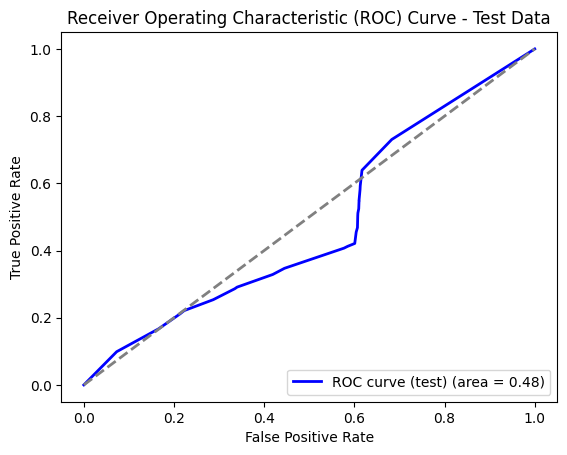

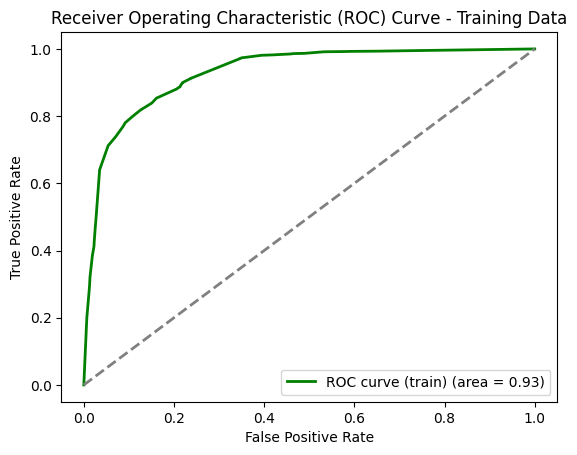

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the tuned Decision Tree model to reduce overfitting
base_model = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=5,               # Limit tree depth
    min_samples_split=20,      # Increase minimum samples per split
    min_samples_leaf=10,       # Increase minimum samples per leaf
    ccp_alpha=0.01,            # Apply post-pruning
    random_state=42
)

# Define the Bagging model using the tuned base model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=50,           # Keep the number of trees reasonable
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1,
    bootstrap=True
)


# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.7303657835075965
Test Log Loss: 0.49946548632119364
Test ROC AUC: 0.7869235823106777
Test Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.60      0.40      9034
           1       0.91      0.75      0.83     50072

    accuracy                           0.73     59106
   macro avg       0.61      0.68      0.61     59106
weighted avg       0.82      0.73      0.76     59106

Class 0 Test Accuracy: 0.5956386982510515
Class 1 Test Accuracy: 0.7546732704904937
Train Accuracy: 0.863193969054412
Train Log Loss: 0.3486915571784327
Train ROC AUC: 0.9389550549379857
Train Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85    104535
           1       0.88      0.88      0.88    130652

    accuracy                           0.86    235187
   macro avg       0.86      0.86      0.86    235187
weighted avg       0.86      0.86      0.86    235187



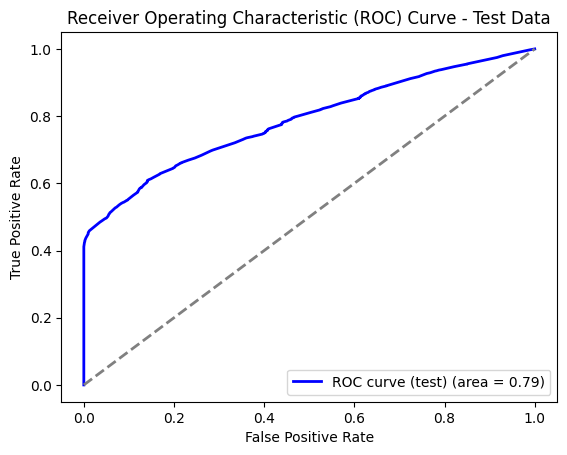

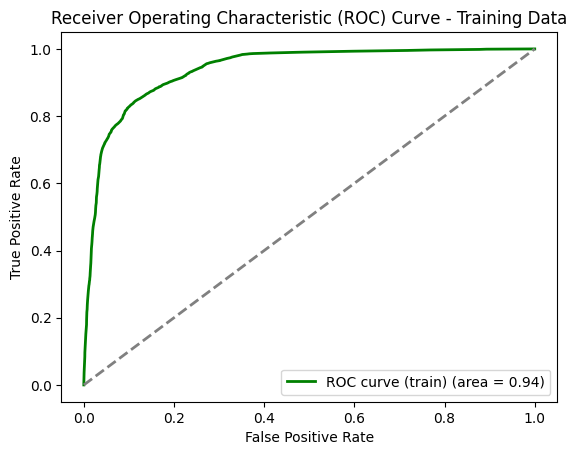

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Define a simpler Decision Tree model to reduce overfitting
base_model = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=3,              # Further reduce tree depth
    min_samples_split=30,     # Increase minimum samples per split
    min_samples_leaf=20,      # Increase minimum samples per leaf
    random_state=42
)

# Define the Bagging model using the simplified base model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=100,         # Increase the number of trees
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1,
    bootstrap=True
)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'min_samples_split': 30, 'min_samples_leaf': 20, 'max_depth': 4, 'ccp_alpha': 0.0}
Stratified K-Fold CV ROC AUC Scores: [0.9426024113959399, 0.9433044970351185, 0.9425050957815461, 0.9443234330754329, 0.9424920470882012]
Mean ROC AUC Score: 0.9430
Test Accuracy: 0.8404
Test Log Loss: 0.4908
Test ROC AUC: 0.7949
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.09      0.15      9034
           1       0.86      0.98      0.91     50072

    accuracy                           0.84     59106
   macro avg       0.63      0.53      0.53     59106
weighted avg       0.79      0.84      0.80     59106



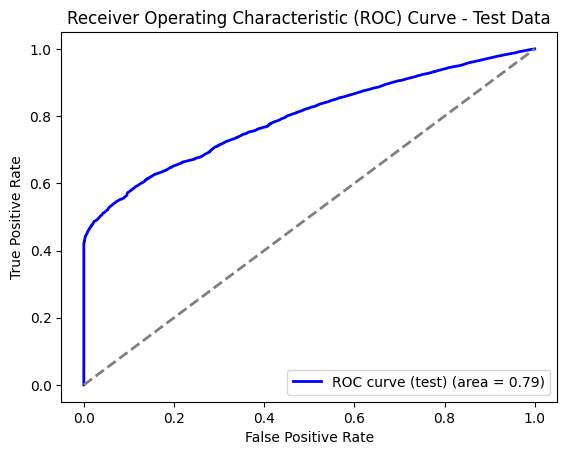

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, roc_curve

# Define the base Decision Tree model
base_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [10, 20, 30, 40],
    'min_samples_leaf': [5, 10, 15, 20],
    'ccp_alpha': [0.0, 0.01, 0.02, 0.05]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get the best estimator
tuned_base_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Define the Bagging model using the tuned base model
bagging_model = BaggingClassifier(
    estimator=tuned_base_model,
    n_estimators=100,        # Increase the number of trees
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1,
    bootstrap=True
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, test_idx in cv.split(X_train, y_train):
    # Use .iloc for indexing
    X_train_cv, X_test_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Fit the model on the current fold
    bagging_model.fit(X_train_cv, y_train_cv)

    # Predict probabilities and calculate ROC AUC
    y_pred_proba_cv = bagging_model.predict_proba(X_test_cv)[:, 1]
    roc_auc_cv = roc_auc_score(y_test_cv, y_pred_proba_cv)
    cv_scores.append(roc_auc_cv)

print(f"Stratified K-Fold CV ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC Score: {np.mean(cv_scores):.4f}")

# Fit the final model on the entire training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test data with adjusted threshold
y_pred_proba = bagging_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.3).astype(int)  # Adjusted threshold for imbalanced test set

# Evaluate the final model on the test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Log Loss: {log_loss_value:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")
print(f"Classification Report:\n{report}")

# Plot ROC curve for the test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'min_samples_split': 30, 'min_samples_leaf': 20, 'max_depth': 4, 'ccp_alpha': 0.0}
Test Accuracy: 0.7228538557845228
Test Log Loss: 0.49075519732194123
Test ROC AUC: 0.7949468616421045
Test Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.67      0.42      9034
           1       0.92      0.73      0.82     50072

    accuracy                           0.72     59106
   macro avg       0.62      0.70      0.62     59106
weighted avg       0.83      0.72      0.76     59106

Class 0 Test Accuracy: 0.6650431702457383
Class 1 Test Accuracy: 0.7332840709378495
Train Accuracy: 0.8651626152806065
Train Log Loss: 0.3389995156070154
Train ROC AUC: 0.9432020962798792
Train Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85    104535
           1       0.89      0.87      0.88    13

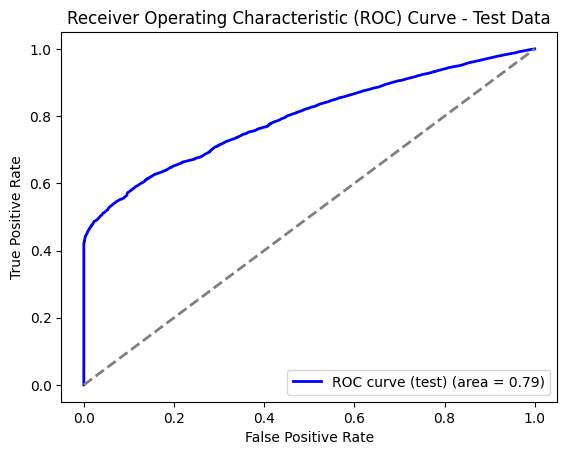

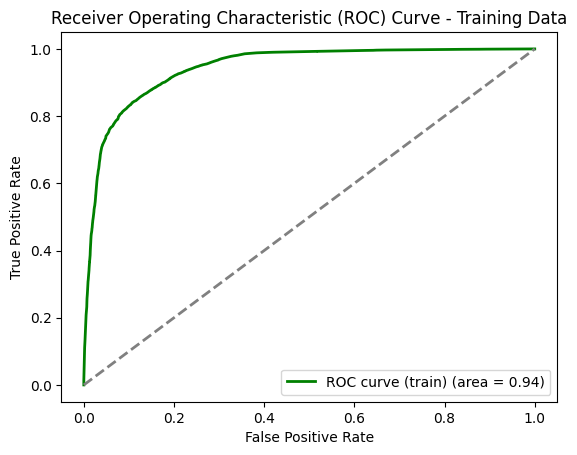

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, roc_curve

# Define the base Decision Tree model
base_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [10, 20, 30, 40],
    'min_samples_leaf': [5, 10, 15, 20],
    'ccp_alpha': [0.0, 0.01, 0.02, 0.05]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get the best estimator
tuned_base_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Define the Bagging model using the tuned base model
model = BaggingClassifier(
    estimator=tuned_base_model,
    n_estimators=100,        # Increase the number of trees
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1,
    bootstrap=True
)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.7658613338747335
Test Log Loss: 0.6294228172031335
Test ROC AUC: 0.6228897799168311
Test Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.42      0.35      9034
           1       0.89      0.83      0.86     50072

    accuracy                           0.77     59106
   macro avg       0.60      0.62      0.61     59106
weighted avg       0.80      0.77      0.78     59106

Class 0 Test Accuracy: 0.42107593535532434
Class 1 Test Accuracy: 0.8280675826809395
Train Accuracy: 0.8627730274207333
Train Log Loss: 0.4367140728578156
Train ROC AUC: 0.9322651742571232
Train Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84    104535
           1       0.86      0.89      0.88    130652

    accuracy                           0.86    235187
   macro avg       0.86      0.86      0.86    235187
weighted avg       0.86      0.86      0.86    235187


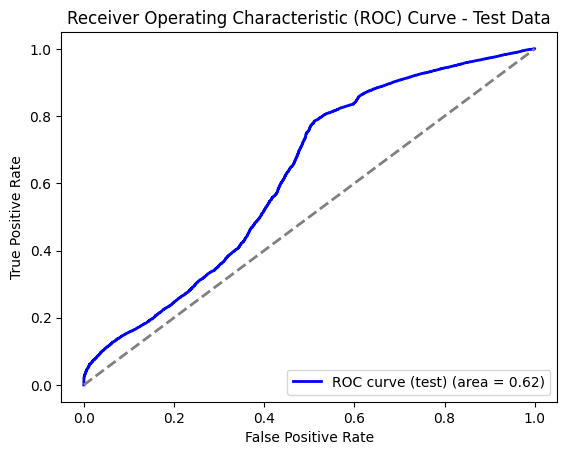

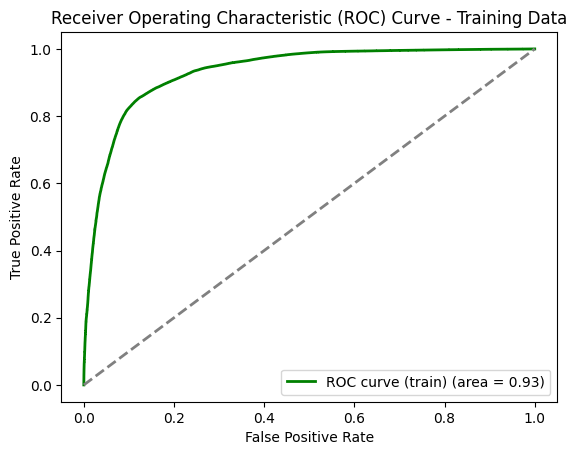

In [18]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Define the base Random Forest model
base_model = RandomForestClassifier(
    n_estimators=50,               # Number of trees in Random Forest
    max_depth=5,                   # Limit tree depth
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',       # Handle class imbalance
    random_state=42,
    n_jobs=-1                      # Use all available CPU cores
)

# Define the Bagging model using the Random Forest as the base model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=20,               # Number of Bagging iterations (outer ensemble)
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1,
    bootstrap=True
)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set

Test Accuracy: 0.7372855547660137
Test Log Loss: 0.609849196011133
Test ROC AUC: 0.7836307669579229
Test Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.60      0.41      9034
           1       0.91      0.76      0.83     50072

    accuracy                           0.74     59106
   macro avg       0.61      0.68      0.62     59106
weighted avg       0.82      0.74      0.77     59106

Class 0 Test Accuracy: 0.5988487934469781
Class 1 Test Accuracy: 0.7622623422271928
Train Accuracy: 0.8666848082589599
Train Log Loss: 0.3874426973294623
Train ROC AUC: 0.9429747722099662
Train Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85    104535
           1       0.90      0.86      0.88    130652

    accuracy                           0.87    235187
   macro avg       0.86      0.87      0.87    235187
weighted avg       0.87      0.87      0.87    235187

C

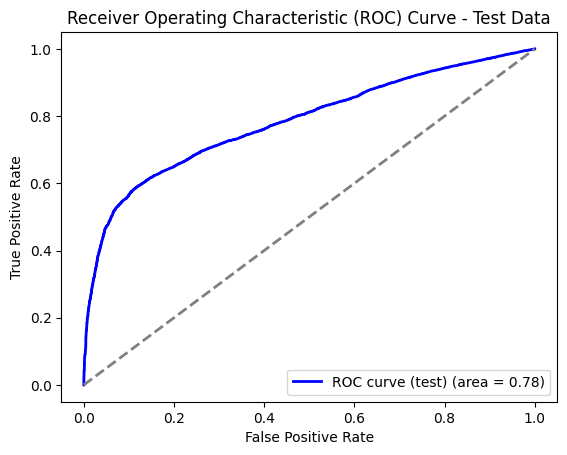

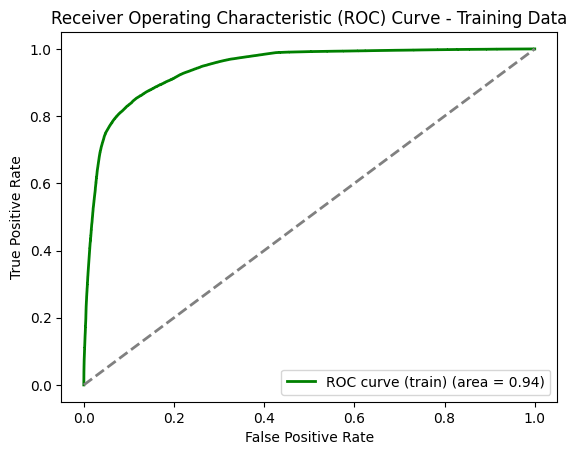

In [19]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the Balanced Random Forest model
model = BalancedRandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 20, 'max_features': 0.8, 'max_depth': 5, 'class_weight': None}
Test Accuracy: 0.7601089567894969
Test Log Loss: 0.45382288638054014
Test ROC AUC: 0.8024647750542295
Test Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42      9034
           1       0.91      0.79      0.85     50072

    accuracy                           0.76     59106
   macro avg       0.62      0.68      0.63     59106
weighted avg       0.82      0.76      0.78     59106

Class 0 Test Accuracy: 0.568297542616781
Class 1 Test Accuracy: 0.7947156095222879
Train Accuracy: 0.8708304455603414
Train Log Loss: 0.3319094745701093
Train ROC AUC: 0.94613243762689
Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85    104535
      

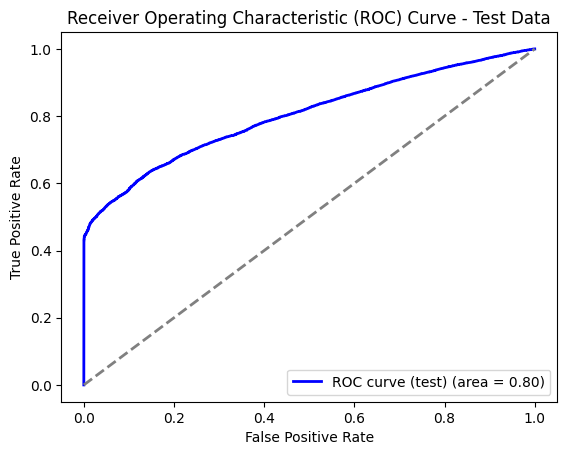

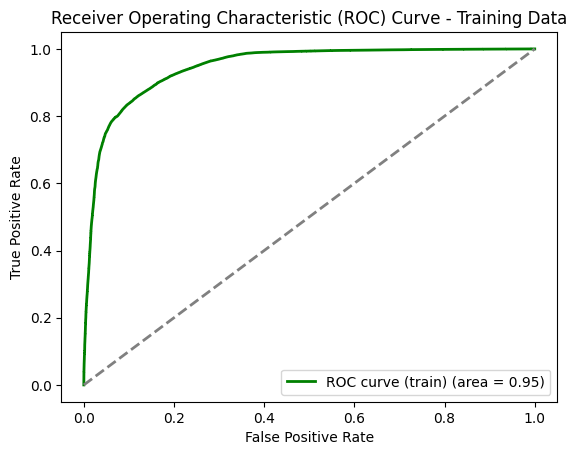

In [20]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150, 200],        # Number of trees
    'max_depth': [4, 5, 6, 7, 8],               # Maximum depth of trees
    'min_samples_split': [10, 20, 30, 40],      # Minimum samples to split a node
    'min_samples_leaf': [5, 10, 15, 20],        # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', 0.8],      # Number of features to consider for split
    'class_weight': ['balanced', None]          # Handling class imbalance
}

# Initialize Random Forest model
base_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    n_iter=20,                  # Number of random parameter combinations to try
    scoring='roc_auc',          # Optimize for ROC AUC
    n_jobs=-1,
    cv=5,                       # 5-fold cross-validation
    random_state=42,
    verbose=2
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best estimator
best_base_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Define the Bagging model using the tuned Random Forest as the base model
model = BaggingClassifier(
    estimator=best_base_model,
    n_estimators=20,            # Number of Bagging iterations (outer ensemble)
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1,
    bootstrap=True
)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.7771292254593443
Test Log Loss: 0.4873605365321604
Test ROC AUC: 0.8000710557492363
Test Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.48      0.40      9034
           1       0.90      0.83      0.86     50072

    accuracy                           0.78     59106
   macro avg       0.62      0.66      0.63     59106
weighted avg       0.81      0.78      0.79     59106

Class 0 Test Accuracy: 0.4837281381447864
Class 1 Test Accuracy: 0.830064706822176
Train Accuracy: 0.8679561370313835
Train Log Loss: 0.41149438498493146
Train ROC AUC: 0.93825661726278
Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85    104535
           1       0.86      0.91      0.88    130652

    accuracy                           0.87    235187
   macro avg       0.87      0.86      0.87    235187
weighted avg       0.87      0.87      0.87    235187

Cl

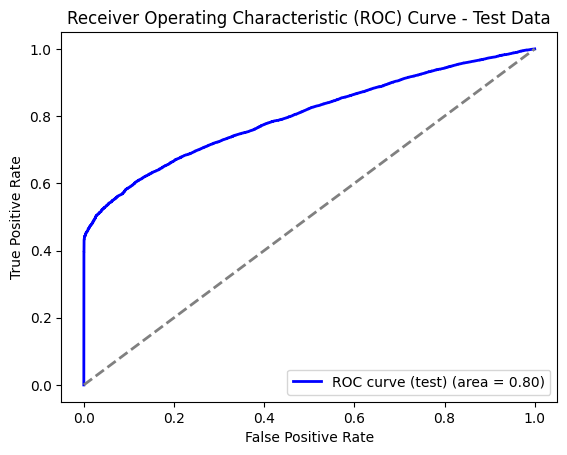

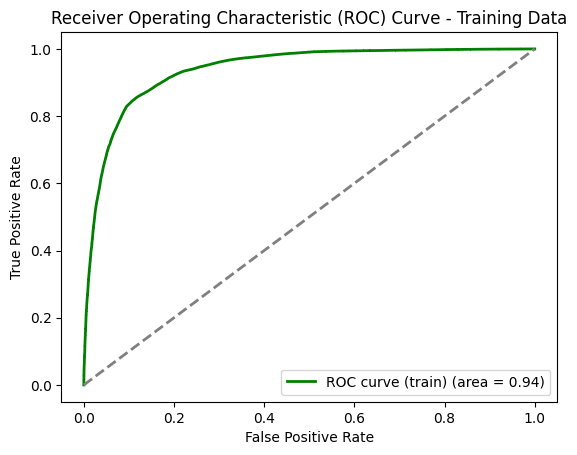

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Define the tuned Random Forest base model
best_base_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=30,
    min_samples_leaf=20,
    max_features=0.8,
    class_weight=None,
    random_state=42,
    n_jobs=-1
)

# Define the Bagging model with tuned parameters
model = BaggingClassifier(
    estimator=best_base_model,
    n_estimators=50,            # Increase the number of Bagging iterations
    max_samples=0.7,            # Use 70% of the data for each base model
    max_features=0.7,           # Use 70% of the features for each base model
    bootstrap=True,             # Sample data with replacement
    bootstrap_features=True,    # Sample features with replacement
    random_state=42,
    n_jobs=-1
)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the base Random Forest model (already tuned)
best_base_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=30,
    min_samples_leaf=20,
    max_features=0.8,
    class_weight=None,
    random_state=42,
    n_jobs=-1
)

# Define the parameter grid for Bagging Classifier
param_grid = {
    'n_estimators': [30, 50, 70, 100],       # Number of base models
    'max_samples': [0.6, 0.7, 0.8, 0.9],     # Fraction of data used for each base model
    'max_features': [0.6, 0.7, 0.8, 0.9],    # Fraction of features used for each base model
    'bootstrap': [True, False],              # Whether to sample data with replacement
    'bootstrap_features': [True, False]      # Whether to sample features with replacement
}

# Initialize Bagging Classifier with the base model
bagging_model = BaggingClassifier(
    estimator=best_base_model,
    random_state=42,
    n_jobs=-1
)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=bagging_model,
    param_distributions=param_grid,
    n_iter=20,                  # Number of random combinations to try
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,                       # 5-fold cross-validation
    random_state=42,
    verbose=2
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best estimator
model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

Test Accuracy: 0.7396372618685074
Test Log Loss: 0.5115048638907682
Test ROC AUC: 0.8012534874288442
Test Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.64      0.43      9034
           1       0.92      0.76      0.83     50072

    accuracy                           0.74     59106
   macro avg       0.62      0.70      0.63     59106
weighted avg       0.83      0.74      0.77     59106

Class 0 Test Accuracy: 0.6385875581137923
Class 1 Test Accuracy: 0.7578686691164723
Train Accuracy: 0.8675436992690922
Train Log Loss: 0.40003413542224997
Train ROC AUC: 0.9409384336161933
Train Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85    104535
           1       0.88      0.88      0.88    130652

    accuracy                           0.87    235187
   macro avg       0.87      0.87      0.87    235187
weighted avg       0.87      0.87      0.87    235187


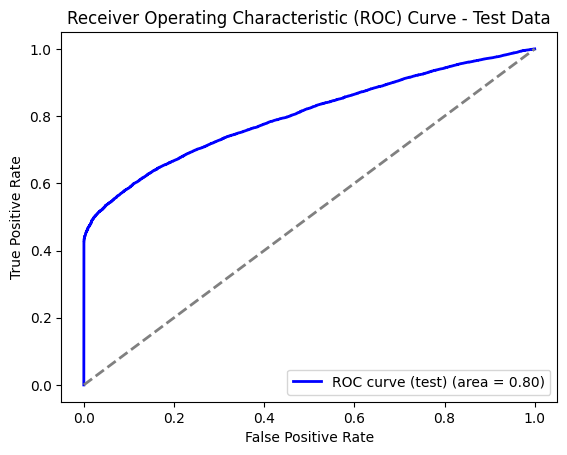

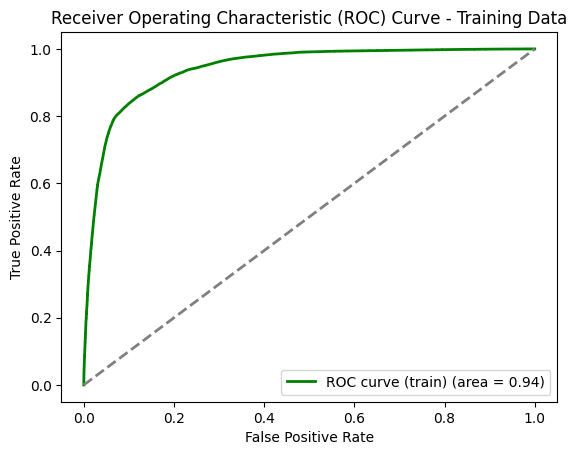

In [24]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Define the Random Forest base model
base_model = RandomForestClassifier(
    n_estimators=100,           # Number of trees in Random Forest
    max_depth=5,                # Limit tree depth to control overfitting
    min_samples_split=20,       # Minimum samples to split a node
    min_samples_leaf=10,        # Minimum samples at a leaf node
    max_features=0.8,           # Fraction of features to consider for split
    class_weight='balanced',    # Handle class imbalance
    random_state=42,
    n_jobs=-1                   # Use all available CPU cores
)

# Define the Bagging model using the Random Forest as the base model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=30,            # Number of Bagging iterations
    max_samples=0.7,            # Use 70% of the data for each base model
    max_features=0.7,           # Use 70% of the features for each base model
    bootstrap=True,             # Sample data with replacement
    bootstrap_features=True,    # Sample features with replacement
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.7227692620038575
Test Log Loss: 0.46431700827162287
Test ROC AUC: 0.8092440487645984
Test Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.74      0.45      9034
           1       0.94      0.72      0.81     50072

    accuracy                           0.72     59106
   macro avg       0.63      0.73      0.63     59106
weighted avg       0.84      0.72      0.76     59106

Class 0 Test Accuracy: 0.7405357538189064
Class 1 Test Accuracy: 0.7195638280875539
Train Accuracy: 0.873428378269207
Train Log Loss: 0.3160869650452946
Train ROC AUC: 0.9492055833279337
Train Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86    104535
           1       0.90      0.87      0.88    130652

    accuracy                           0.87    235187
   macro avg       0.87      0.87      0.87    235187
weighted avg       0.87      0.87      0.87    235187



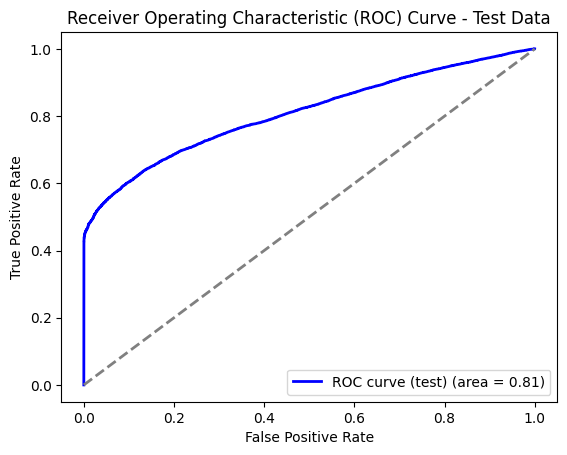

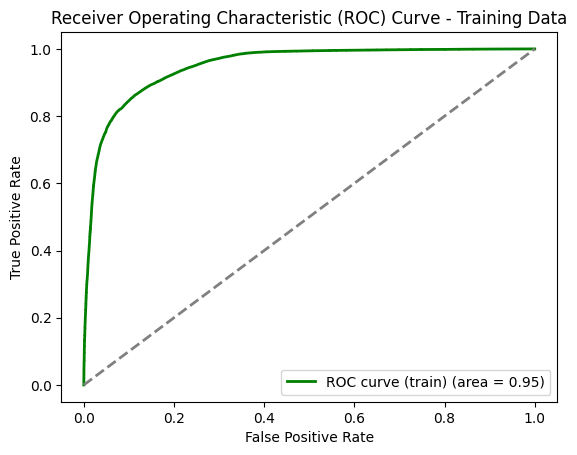

In [25]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Define the Random Forest base model
base_model = RandomForestClassifier(
    n_estimators=150,           # Increased number of trees
    max_depth=6,                # Increased depth for better learning
    min_samples_split=25,       # Decreased split for more splits
    min_samples_leaf=15,        # Decreased leaf size for deeper trees
    max_features=0.9,           # Increased feature usage
    class_weight='balanced',    # Handle class imbalance
    random_state=42,
    n_jobs=-1
)

# Define the Bagging model with updated parameters
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=70,            # Increased number of Bagging iterations
    max_samples=0.8,            # Use 80% of the data for each base model
    max_features=0.8,           # Use 80% of the features for each base model
    bootstrap=False,            # Disable bootstrapping of samples
    bootstrap_features=False,   # Disable bootstrapping of features
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.7802253578316922
Test Log Loss: 0.43818567966414174
Test ROC AUC: 0.8115009416327582
Test Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.52      0.42      9034
           1       0.91      0.83      0.86     50072

    accuracy                           0.78     59106
   macro avg       0.63      0.67      0.64     59106
weighted avg       0.82      0.78      0.80     59106

Class 0 Test Accuracy: 0.520810272304627
Class 1 Test Accuracy: 0.8270290781274964
Train Accuracy: 0.8760050512996042
Train Log Loss: 0.3279670997615966
Train ROC AUC: 0.9484442204478365
Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86    104535
           1       0.88      0.90      0.89    130652

    accuracy                           0.88    235187
   macro avg       0.88      0.87      0.87    235187
weighted avg       0.88      0.88      0.88    235187



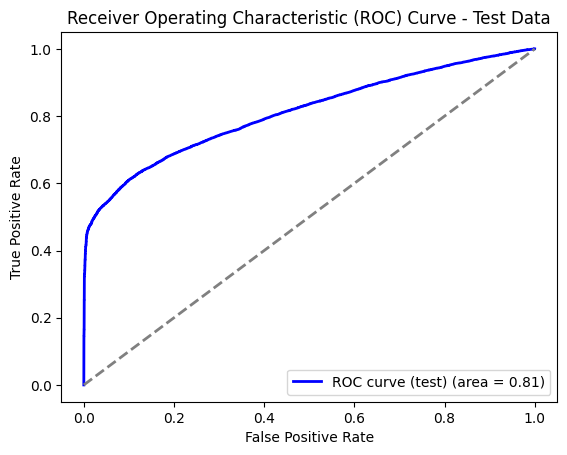

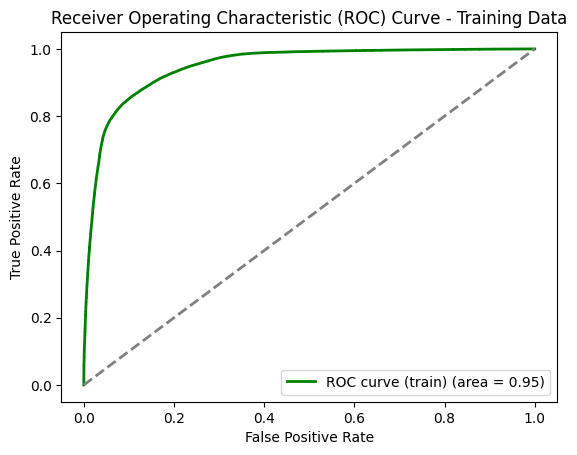

In [26]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Define the Gradient Boosting base model
base_model = GradientBoostingClassifier(
    n_estimators=100,         # Number of boosting stages
    learning_rate=0.1,        # Step size shrinkage
    max_depth=3,              # Depth of each tree
    min_samples_split=10,     # Minimum samples required to split a node
    min_samples_leaf=5,       # Minimum samples required at a leaf node
    subsample=0.8,            # Fraction of samples used for fitting each tree
    random_state=42
)

# Define the Bagging model using the GBM as the base model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=30,          # Number of Bagging iterations
    max_samples=0.8,          # Use 80% of the data for each base model
    max_features=0.8,         # Use 80% of the features for each base model
    bootstrap=True,           # Sample data with replacement
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.7802253578316922
Test Log Loss: 0.43818567966414174
Test ROC AUC: 0.8115009416327582
Test Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.52      0.42      9034
           1       0.91      0.83      0.86     50072

    accuracy                           0.78     59106
   macro avg       0.63      0.67      0.64     59106
weighted avg       0.82      0.78      0.80     59106

Class 0 Test Accuracy: 0.520810272304627
Class 1 Test Accuracy: 0.8270290781274964
Train Accuracy: 0.8760050512996042
Train Log Loss: 0.3279670997615966
Train ROC AUC: 0.9484442204478365
Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86    104535
           1       0.88      0.90      0.89    130652

    accuracy                           0.88    235187
   macro avg       0.88      0.87      0.87    235187
weighted avg       0.88      0.88      0.88    235187



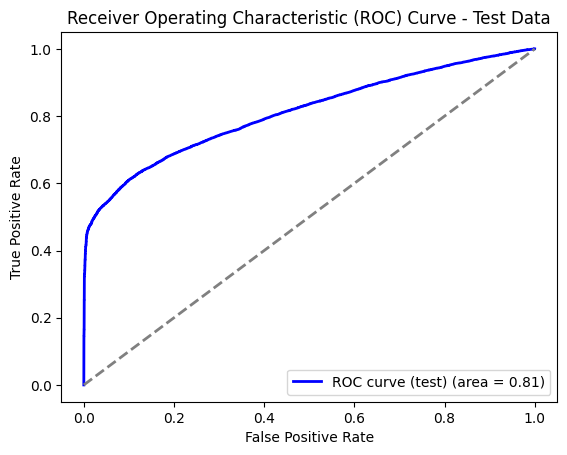

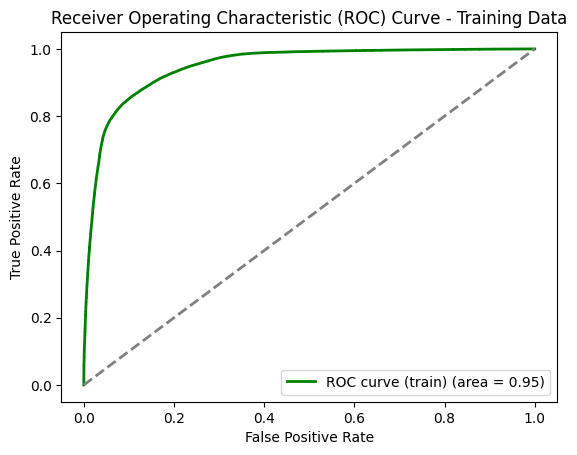

In [27]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Define the Gradient Boosting base model
base_model = GradientBoostingClassifier(
    n_estimators=100,         # Number of boosting stages
    learning_rate=0.1,        # Step size shrinkage
    max_depth=3,              # Depth of each tree
    min_samples_split=10,     # Minimum samples required to split a node
    min_samples_leaf=5,       # Minimum samples required at a leaf node
    subsample=0.8,            # Fraction of samples used for fitting each tree
    random_state=42
)

# Define the Bagging model using the GBM as the base model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=30,          # Number of Bagging iterations
    max_samples=0.8,          # Use 80% of the data for each base model
    max_features=0.8,         # Use 80% of the features for each base model
    bootstrap=True,           # Sample data with replacement
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.7951138632287754
Test Log Loss: 0.38359130665853264
Test ROC AUC: 0.8198271332318876
Test Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.47      0.41      9034
           1       0.90      0.85      0.88     50072

    accuracy                           0.80     59106
   macro avg       0.63      0.66      0.64     59106
weighted avg       0.82      0.80      0.81     59106

Class 0 Test Accuracy: 0.46978082798317466
Class 1 Test Accuracy: 0.8538105128614795
Train Accuracy: 0.879572425346639
Train Log Loss: 0.2860349401990216
Train ROC AUC: 0.9529901429308906
Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86    104535
           1       0.88      0.90      0.89    130652

    accuracy                           0.88    235187
   macro avg       0.88      0.88      0.88    235187
weighted avg       0.88      0.88      0.88    235187


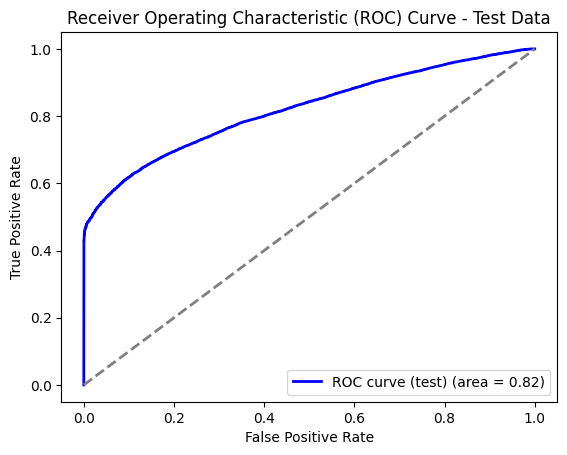

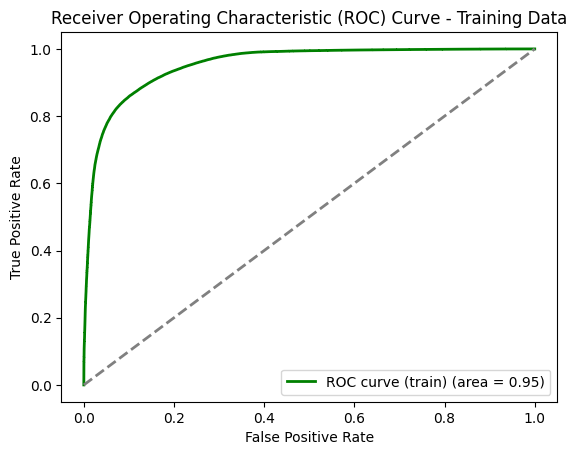

In [29]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Define the updated Gradient Boosting base model with new parameters
base_model = GradientBoostingClassifier(
    n_estimators=200,         # Increased number of boosting stages
    learning_rate=0.05,       # Reduced learning rate for more conservative updates
    max_depth=4,              # Increased depth of each tree
    min_samples_split=30,     # Increased for stronger regularization
    min_samples_leaf=15,      # Increased for stronger regularization
    subsample=1.0,            # Use full dataset per boosting iteration
    max_features=0.8,         # Limit features for each tree to reduce overfitting
    random_state=42
)

# Define the Bagging model with updated parameters
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=70,          # Increased number of Bagging iterations
    max_samples=0.9,          # Use 90% of the data for each base model
    max_features=0.9,         # Use 90% of the features for each base model
    bootstrap=True,           # Sample data with replacement
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()


Test Accuracy: 0.7936250126890672
Test Log Loss: 0.38117741215645806
Test ROC AUC: 0.82608145886041
Test Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.51      0.43      9034
           1       0.90      0.85      0.87     50072

    accuracy                           0.79     59106
   macro avg       0.64      0.68      0.65     59106
weighted avg       0.82      0.79      0.81     59106

Class 0 Test Accuracy: 0.5065308833296436
Class 1 Test Accuracy: 0.8454225914682857
Train Accuracy: 0.8791854991985101
Train Log Loss: 0.28518082393104877
Train ROC AUC: 0.9532082272725196
Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86    104535
           1       0.89      0.90      0.89    130652

    accuracy                           0.88    235187
   macro avg       0.88      0.88      0.88    235187
weighted avg       0.88      0.88      0.88    235187



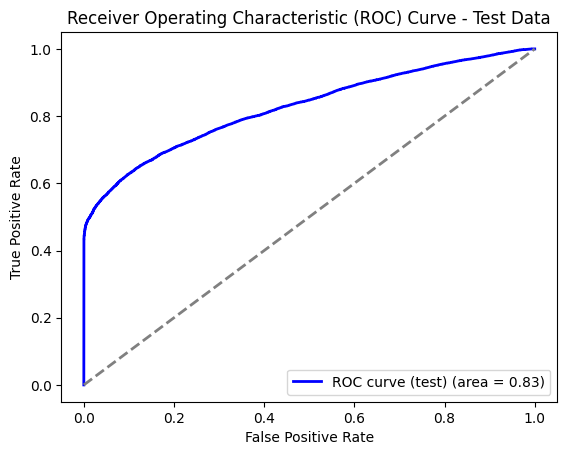

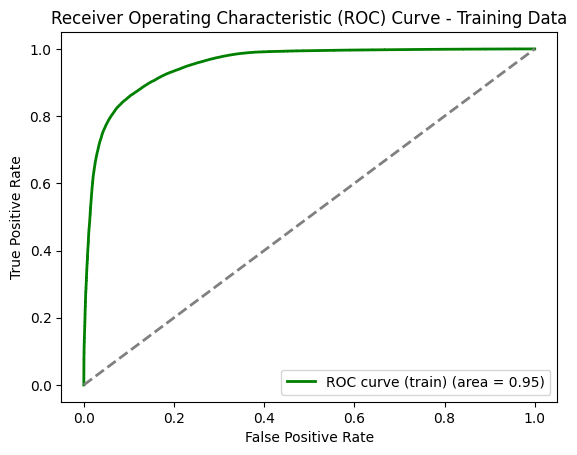

In [30]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Define the XGBoost base model
base_model = xgb.XGBClassifier(
    n_estimators=200,         # Number of boosting rounds
    learning_rate=0.05,       # Learning rate for more conservative updates
    max_depth=4,              # Maximum depth of trees
    min_child_weight=3,       # Minimum sum of instance weight (Hessian) needed in a child
    subsample=0.9,            # Subsample ratio of the training instance
    colsample_bytree=0.8,     # Subsample ratio of columns when constructing each tree
    scale_pos_weight=1,       # Balancing the positive and negative classes
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Define the Bagging model using the XGBoost as the base model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=50,          # Number of Bagging iterations
    max_samples=0.9,          # Use 90% of the data for each base model
    max_features=0.9,         # Use 90% of the features for each base model
    bootstrap=True,           # Sample data with replacement
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.7812235644435421
Test Log Loss: 0.43706016356759686
Test ROC AUC: 0.811106907536433
Test Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.52      0.42      9034
           1       0.90      0.83      0.87     50072

    accuracy                           0.78     59106
   macro avg       0.63      0.67      0.64     59106
weighted avg       0.82      0.78      0.80     59106

Class 0 Test Accuracy: 0.5168253265441665
Class 1 Test Accuracy: 0.8289263460616711
Train Accuracy: 0.8754735593378886
Train Log Loss: 0.3252272258314026
Train ROC AUC: 0.9488059491088124
Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86    104535
           1       0.88      0.90      0.89    130652

    accuracy                           0.88    235187
   macro avg       0.87      0.87      0.87    235187
weighted avg       0.88      0.88      0.88    235187



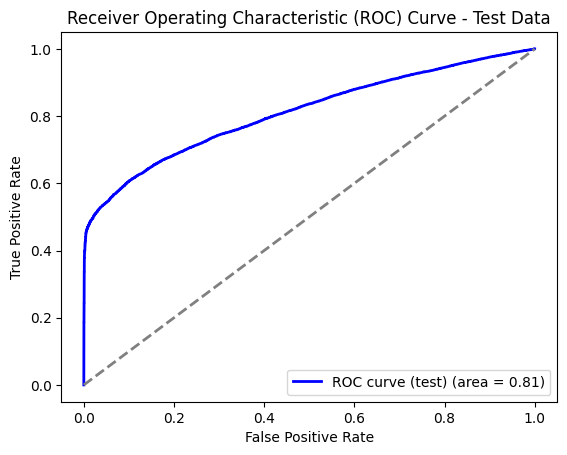

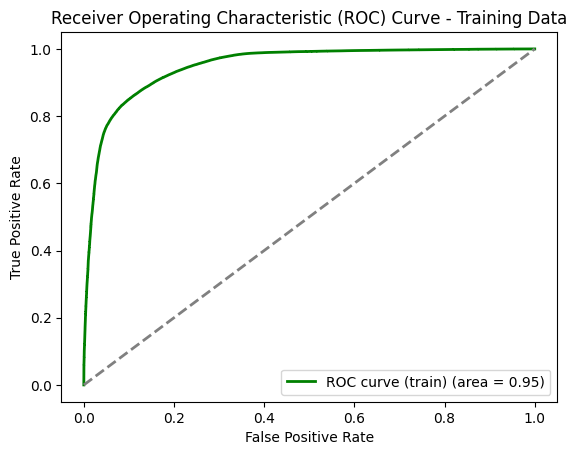

In [31]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Define the simplified XGBoost base model
base_model = xgb.XGBClassifier(
    n_estimators=100,         # Number of boosting rounds (reduced)
    max_depth=3,              # Shallow trees for faster training
    learning_rate=0.1,        # Default learning rate
    random_state=42,
    use_label_encoder=False,
    n_jobs=-1
)

# Define the Bagging model using the simplified XGBoost as the base model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=20,          # Fewer Bagging iterations for faster training
    max_samples=0.8,          # Use 80% of the data for each base model
    max_features=0.8,         # Use 80% of the features for each base model
    bootstrap=True,           # Sample data with replacement
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.8157039894426962
Test Log Loss: 0.3681265492729215
Test ROC AUC: 0.8519958700250917
Test Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.57      0.49      9034
           1       0.92      0.86      0.89     50072

    accuracy                           0.82     59106
   macro avg       0.67      0.72      0.69     59106
weighted avg       0.84      0.82      0.83     59106

Class 0 Test Accuracy: 0.5729466460039849
Class 1 Test Accuracy: 0.8595023166640038
Train Accuracy: 0.8861076505078938
Train Log Loss: 0.3010718909054036
Train ROC AUC: 0.956375282333085
Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87    104535
           1       0.89      0.90      0.90    130652

    accuracy                           0.89    235187
   macro avg       0.89      0.88      0.88    235187
weighted avg       0.89      0.89      0.89    235187

C

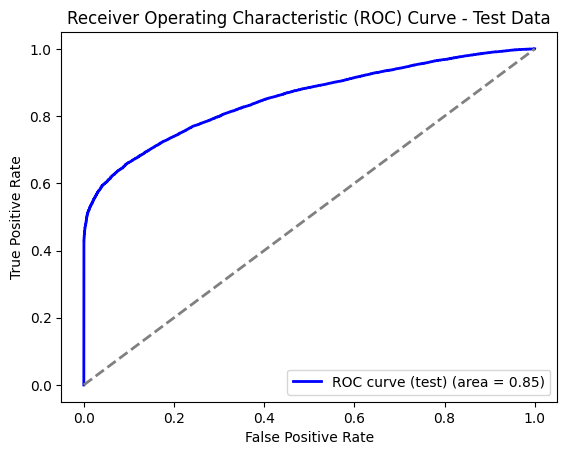

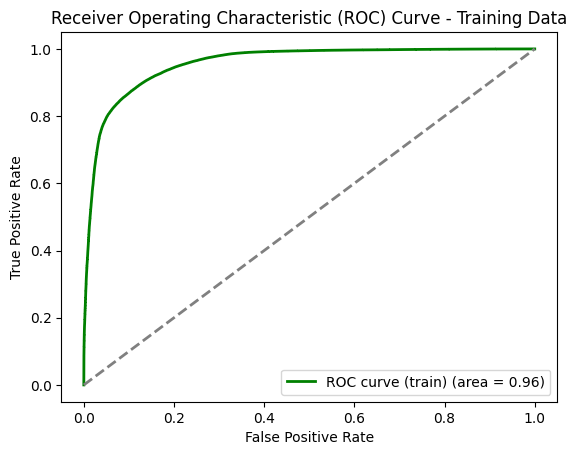

In [32]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Define the simplified XGBoost base model
base_model =  xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)


# Define the Bagging model using the simplified XGBoost as the base model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=20,          # Fewer Bagging iterations for faster training
    max_samples=0.8,          # Use 80% of the data for each base model
    max_features=0.8,         # Use 80% of the features for each base model
    bootstrap=True,           # Sample data with replacement
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.7932020437857409
Test Log Loss: 0.39140259648390924
Test ROC AUC: 0.8520440284829784
Test Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50      9034
           1       0.93      0.82      0.87     50072

    accuracy                           0.79     59106
   macro avg       0.66      0.74      0.68     59106
weighted avg       0.85      0.79      0.81     59106

Class 0 Test Accuracy: 0.6719061323887536
Class 1 Test Accuracy: 0.8150862757629014
Train Accuracy: 0.8839476671754817
Train Log Loss: 0.3034910028377733
Train ROC AUC: 0.9565777134978798
Train Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87    104535
           1       0.91      0.88      0.89    130652

    accuracy                           0.88    235187
   macro avg       0.88      0.88      0.88    235187
weighted avg       0.88      0.88      0.88    235187


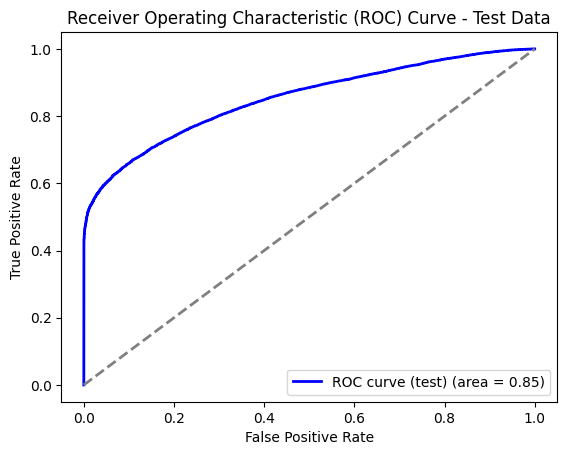

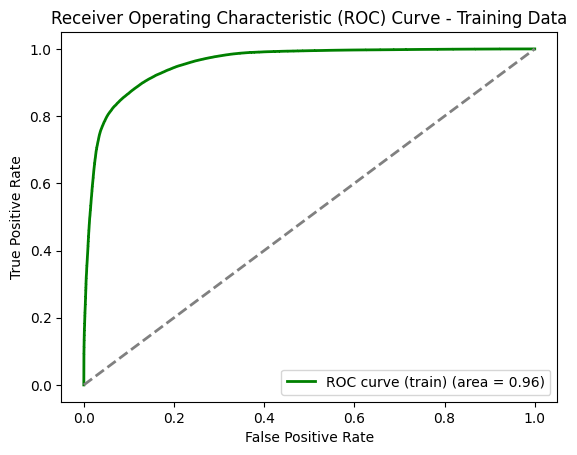

In [33]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Define the simplified XGBoost base model
base_model =  xgb.XGBClassifier(
    max_depth=6,                  
    learning_rate=0.1,            
    n_estimators=100,            
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), 
    random_state=42
)

# Define the Bagging model using the simplified XGBoost as the base model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=20,          # Fewer Bagging iterations for faster training
    max_samples=0.8,          # Use 80% of the data for each base model
    max_features=0.8,         # Use 80% of the features for each base model
    bootstrap=True,           # Sample data with replacement
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.8017798531451967
Test Log Loss: 0.3714761646477902
Test ROC AUC: 0.8522099275117773
Test Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.65      0.50      9034
           1       0.93      0.83      0.88     50072

    accuracy                           0.80     59106
   macro avg       0.67      0.74      0.69     59106
weighted avg       0.85      0.80      0.82     59106

Class 0 Test Accuracy: 0.6484392295771529
Class 1 Test Accuracy: 0.8294455983383927
Train Accuracy: 0.8841390042816992
Train Log Loss: 0.27303127545141115
Train ROC AUC: 0.9582180715239572
Train Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87    104535
           1       0.91      0.88      0.89    130652

    accuracy                           0.88    235187
   macro avg       0.88      0.88      0.88    235187
weighted avg       0.89      0.88      0.88    235187


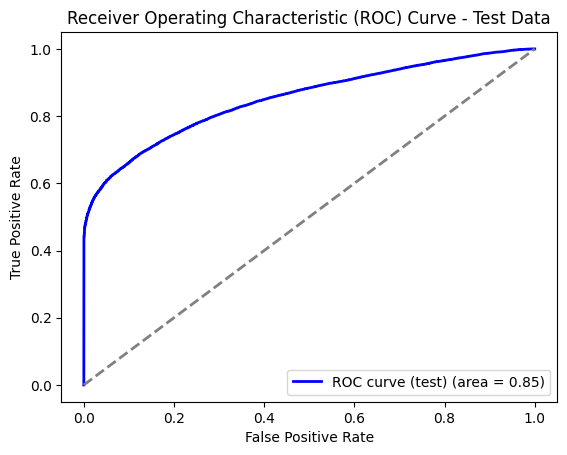

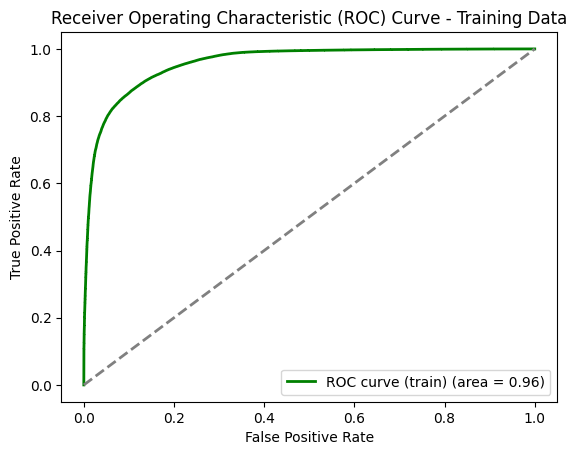

In [34]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Calculate scale_pos_weight based on class distribution
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the updated XGBoost base model
base_model = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=42,
    use_label_encoder=False,
    n_jobs=-1
)

# Define the Bagging model using the updated XGBoost as the base model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=50,          # Increased Bagging iterations for more stability
    max_samples=0.9,          # Use 90% of the data for each base model
    max_features=0.9,         # Use 90% of the features for each base model
    bootstrap=True,           # Sample data with replacement
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.8485
Test Log Loss: 0.3715
Test ROC AUC: 0.8522
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.01      0.02      9034
           1       0.85      1.00      0.92     50072

    accuracy                           0.85     59106
   macro avg       0.84      0.51      0.47     59106
weighted avg       0.85      0.85      0.78     59106

Class 0 Accuracy: 0.0112
Class 1 Accuracy: 0.9996


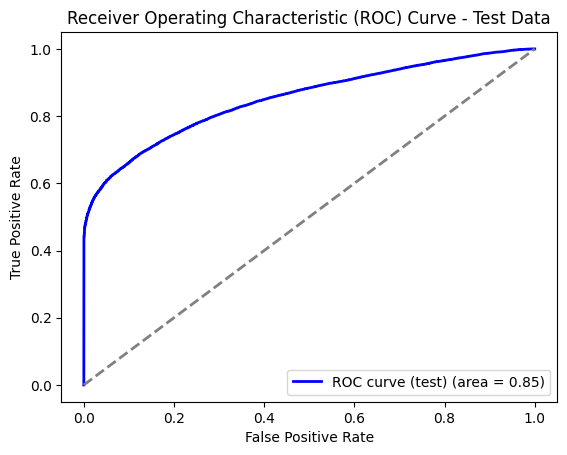

In [35]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Calculate scale_pos_weight based on class distribution
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the updated XGBoost base model
base_model = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=42,
    use_label_encoder=False,
    n_jobs=-1
)

# Define the Bagging model using the updated XGBoost as the base model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=50,          # Increased Bagging iterations for more stability
    max_samples=0.9,          # Use 90% of the data for each base model
    max_features=0.9,         # Use 90% of the features for each base model
    bootstrap=True,           # Sample data with replacement
    random_state=42,
    n_jobs=-1
)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on the test data with a lower threshold
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.2).astype(int)  # Lowered threshold to 0.2

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Calculate confusion matrix and class-specific accuracies
conf_matrix = confusion_matrix(y_test, y_pred)
class_0_accuracy = conf_matrix[0, 0] / conf_matrix[0].sum()
class_1_accuracy = conf_matrix[1, 1] / conf_matrix[1].sum()

# Print evaluation metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Log Loss: {log_loss_value:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")
print(f"Classification Report:\n{report}")
print(f"Class 0 Accuracy: {class_0_accuracy:.4f}")
print(f"Class 1 Accuracy: {class_1_accuracy:.4f}")

# Plot ROC curve for the test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()


Test Accuracy: 0.8098500998206611
Test Log Loss: 0.36001931834231526
Test ROC AUC: 0.846065547612766
Test Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.56      0.48      9034
           1       0.92      0.85      0.88     50072

    accuracy                           0.81     59106
   macro avg       0.66      0.71      0.68     59106
weighted avg       0.84      0.81      0.82     59106

Class 0 Test Accuracy: 0.5628735886650432
Class 1 Test Accuracy: 0.8544096501038505
Train Accuracy: 0.8856569453243589
Train Log Loss: 0.2713987321159105
Train ROC AUC: 0.9579811882724247
Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    104535
           1       0.90      0.90      0.90    130652

    accuracy                           0.89    235187
   macro avg       0.88      0.88      0.88    235187
weighted avg       0.89      0.89      0.89    235187



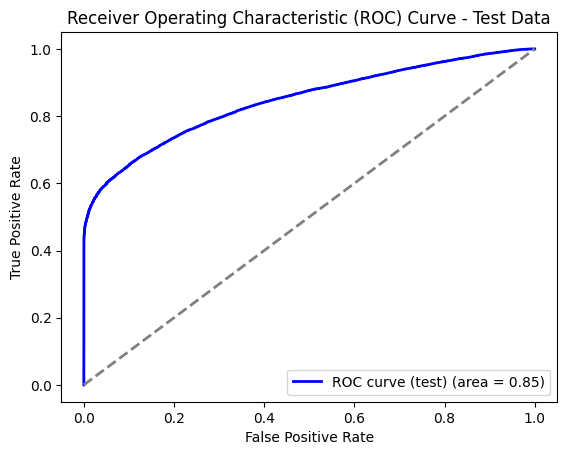

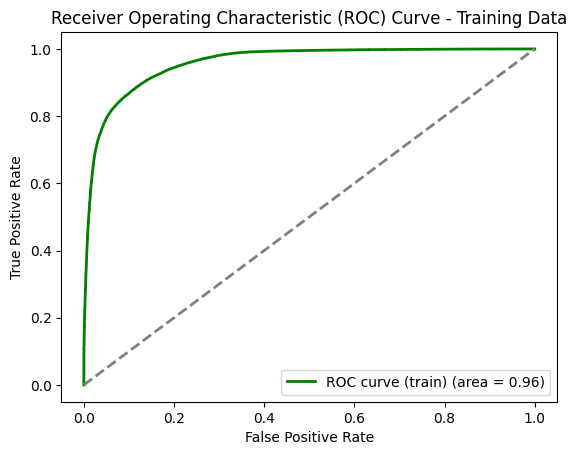

In [36]:
# Define the updated XGBoost base model with further adjustments
base_model = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.05,       # Reduced learning rate for more conservative updates
    n_estimators=200,         # Increased boosting rounds
    scale_pos_weight=scale_pos_weight * 1.2,  # Slightly increased for more focus on Class 0
    random_state=42,
    use_label_encoder=False,
    n_jobs=-1
)

# Define the Bagging model with increased iterations
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=70,          # Increased Bagging iterations for more stability
    max_samples=0.9,          # Use 90% of the data for each base model
    max_features=0.9,         # Use 90% of the features for each base model
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.8480
Test Log Loss: 0.3610
Test ROC AUC: 0.8415
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.01      0.01      9034
           1       0.85      1.00      0.92     50072

    accuracy                           0.85     59106
   macro avg       0.91      0.50      0.46     59106
weighted avg       0.87      0.85      0.78     59106

Class 0 Accuracy: 0.0055
Class 1 Accuracy: 1.0000


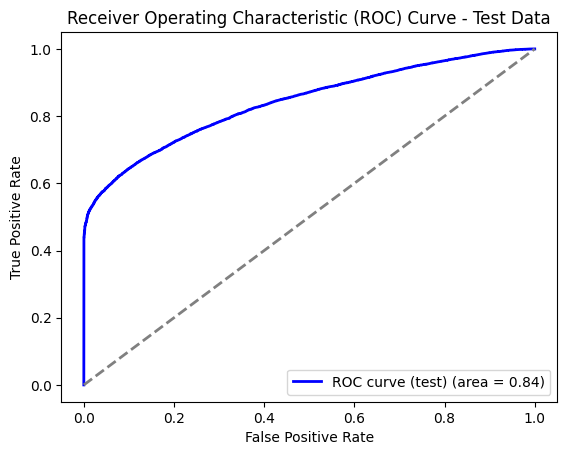

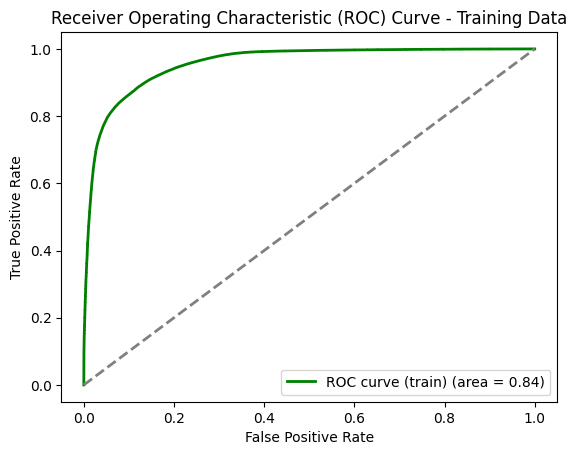

In [37]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Calculate scale_pos_weight based on class distribution
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the optimized XGBoost base model
base_model = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.03,          # Further reduced learning rate
    n_estimators=250,            # Increased boosting rounds
    min_child_weight=10,         # Increased for stronger regularization
    reg_alpha=0.1,               # L1 regularization term
    reg_lambda=1.0,              # L2 regularization term
    subsample=0.8,               # Subsampling to reduce variance
    colsample_bytree=0.8,        # Feature subsampling
    scale_pos_weight=scale_pos_weight * 1.3,  # Increased focus on Class 0
    random_state=42,
    use_label_encoder=False,
    n_jobs=-1
)

# Define the optimized Bagging model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=100,            # Increased Bagging iterations for more stability
    max_samples=0.9,             # Use 90% of the data for each base model
    max_features=0.9,            # Use 90% of the features for each base model
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data with a lower threshold
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.15).astype(int)  # Lowered threshold to 0.15

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Calculate confusion matrix and class-specific accuracies
conf_matrix = confusion_matrix(y_test, y_pred)
class_0_accuracy = conf_matrix[0, 0] / conf_matrix[0].sum()
class_1_accuracy = conf_matrix[1, 1] / conf_matrix[1].sum()

# Print evaluation metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Log Loss: {log_loss_value:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")
print(f"Classification Report:\n{report}")
print(f"Class 0 Accuracy: {class_0_accuracy:.4f}")
print(f"Class 1 Accuracy: {class_1_accuracy:.4f}")

# Plot ROC curve for the test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
y_train_pred_proba = model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.8134030386086015
Test Log Loss: 0.36102984739423477
Test ROC AUC: 0.8414904941135373
Test Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.51      0.45      9034
           1       0.91      0.87      0.89     50072

    accuracy                           0.81     59106
   macro avg       0.66      0.69      0.67     59106
weighted avg       0.83      0.81      0.82     59106

Class 0 Test Accuracy: 0.5061988045162719
Class 1 Test Accuracy: 0.8688288864035788
Train Accuracy: 0.8842410507383487
Train Log Loss: 0.2808404452885853
Train ROC AUC: 0.9564501768972662
Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87    104535
           1       0.89      0.91      0.90    130652

    accuracy                           0.88    235187
   macro avg       0.88      0.88      0.88    235187
weighted avg       0.88      0.88      0.88    235187


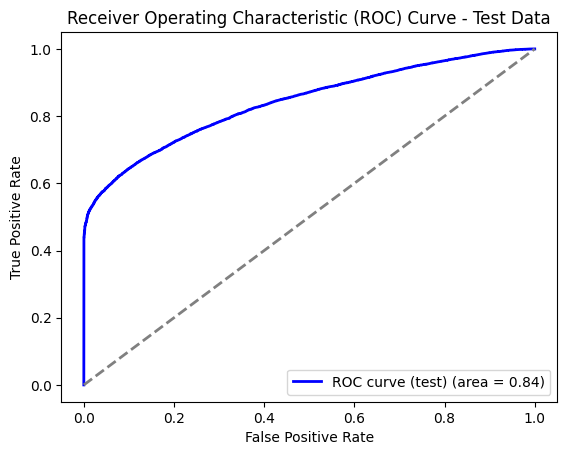

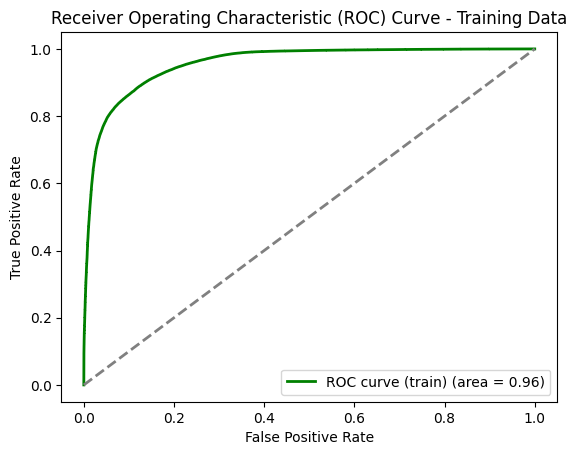

In [38]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Calculate scale_pos_weight based on class distribution
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the optimized XGBoost base model
base_model = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.03,          # Further reduced learning rate
    n_estimators=250,            # Increased boosting rounds
    min_child_weight=10,         # Increased for stronger regularization
    reg_alpha=0.1,               # L1 regularization term
    reg_lambda=1.0,              # L2 regularization term
    subsample=0.8,               # Subsampling to reduce variance
    colsample_bytree=0.8,        # Feature subsampling
    scale_pos_weight=scale_pos_weight * 1.3,  # Increased focus on Class 0
    random_state=42,
    use_label_encoder=False,
    n_jobs=-1
)

# Define the optimized Bagging model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=100,            # Increased Bagging iterations for more stability
    max_samples=0.9,             # Use 90% of the data for each base model
    max_features=0.9,            # Use 90% of the features for each base model
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.8472
Test Log Loss: 0.3599
Test ROC AUC: 0.8302
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9034
           1       0.85      1.00      0.92     50072

    accuracy                           0.85     59106
   macro avg       0.42      0.50      0.46     59106
weighted avg       0.72      0.85      0.78     59106

Class 0 Accuracy: 0.0000
Class 1 Accuracy: 1.0000


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

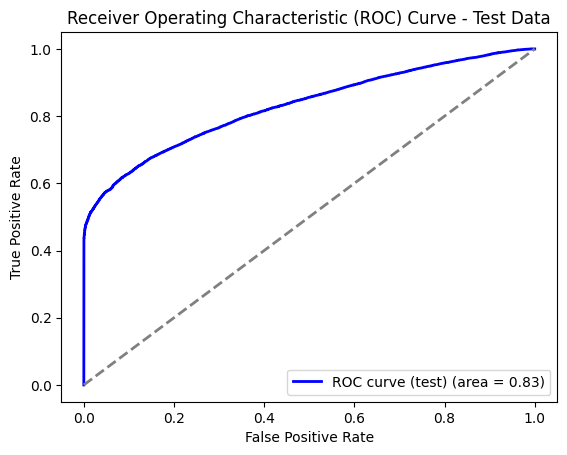

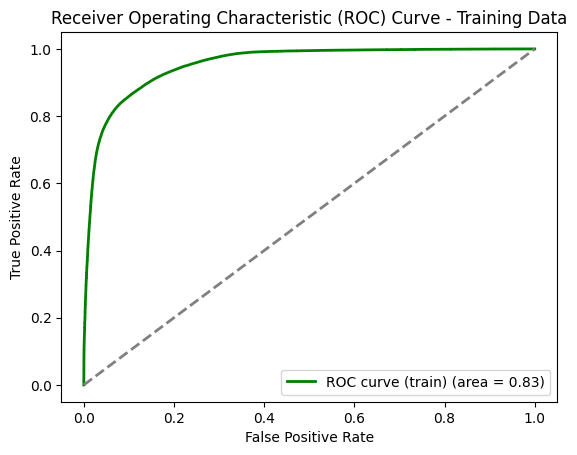

In [39]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Calculate scale_pos_weight based on class distribution
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the further optimized XGBoost base model
base_model = xgb.XGBClassifier(
    max_depth=5,                # Reduced depth for better generalization
    learning_rate=0.03,         # Conservative learning rate
    n_estimators=250,           # Increased boosting rounds
    min_child_weight=10,        # Increased for regularization
    reg_alpha=0.2,              # Increased L1 regularization
    reg_lambda=2.0,             # Increased L2 regularization
    subsample=0.8,              # Subsampling to reduce variance
    colsample_bytree=0.8,       # Feature subsampling
    scale_pos_weight=scale_pos_weight * 1.5,  # Increased focus on Class 0
    random_state=42,
    use_label_encoder=False,
    n_jobs=-1
)

# Define the Bagging model with increased iterations
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=100,           # Increased Bagging iterations for stability
    max_samples=0.9,
    max_features=0.9,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data with a lower threshold
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.1).astype(int)  # Lowered threshold to 0.1

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Calculate confusion matrix and class-specific accuracies
conf_matrix = confusion_matrix(y_test, y_pred)
class_0_accuracy = conf_matrix[0, 0] / conf_matrix[0].sum()
class_1_accuracy = conf_matrix[1, 1] / conf_matrix[1].sum()

# Print evaluation metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Log Loss: {log_loss_value:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")
print(f"Classification Report:\n{report}")
print(f"Class 0 Accuracy: {class_0_accuracy:.4f}")
print(f"Class 1 Accuracy: {class_1_accuracy:.4f}")

# Plot ROC curve for the test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
y_train_pred_proba = model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()


Test Accuracy: 0.8170405711772071
Test Log Loss: 0.3599305705402935
Test ROC AUC: 0.8301549300112553
Test Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.41      0.40      9034
           1       0.89      0.89      0.89     50072

    accuracy                           0.82     59106
   macro avg       0.65      0.65      0.65     59106
weighted avg       0.82      0.82      0.82     59106

Class 0 Test Accuracy: 0.4069072393181315
Class 1 Test Accuracy: 0.8910369068541301
Train Accuracy: 0.8799168321378308
Train Log Loss: 0.28844583513077504
Train ROC AUC: 0.9541925950860323
Train Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86    104535
           1       0.87      0.92      0.89    130652

    accuracy                           0.88    235187
   macro avg       0.88      0.88      0.88    235187
weighted avg       0.88      0.88      0.88    235187


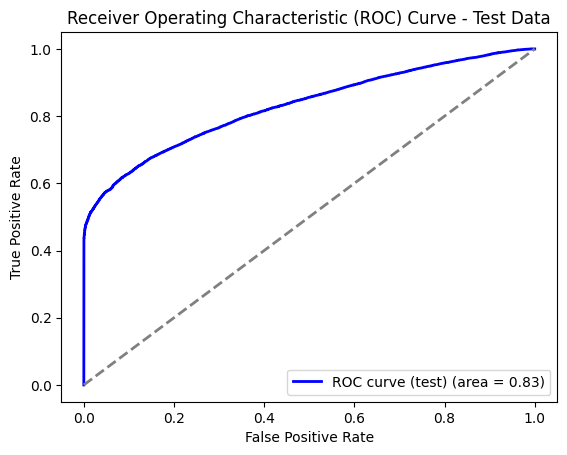

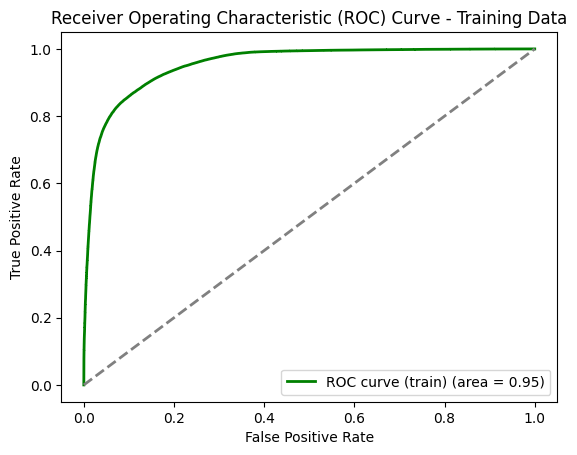

In [40]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Calculate scale_pos_weight based on class distribution
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the further optimized XGBoost base model
base_model = xgb.XGBClassifier(
    max_depth=5,                # Reduced depth for better generalization
    learning_rate=0.03,         # Conservative learning rate
    n_estimators=250,           # Increased boosting rounds
    min_child_weight=10,        # Increased for regularization
    reg_alpha=0.2,              # Increased L1 regularization
    reg_lambda=2.0,             # Increased L2 regularization
    subsample=0.8,              # Subsampling to reduce variance
    colsample_bytree=0.8,       # Feature subsampling
    scale_pos_weight=scale_pos_weight * 1.5,  # Increased focus on Class 0
    random_state=42,
    use_label_encoder=False,
    n_jobs=-1
)

# Define the Bagging model with increased iterations
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=100,           # Increased Bagging iterations for stability
    max_samples=0.9,
    max_features=0.9,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

Test Accuracy: 0.8137583324873955
Test Log Loss: 0.38550572278404893
Test ROC AUC: 0.8196622345336994
Test Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.39      0.39      9034
           1       0.89      0.89      0.89     50072

    accuracy                           0.81     59106
   macro avg       0.64      0.64      0.64     59106
weighted avg       0.81      0.81      0.81     59106

Class 0 Test Accuracy: 0.3854328093867611
Class 1 Test Accuracy: 0.8910369068541301
Train Accuracy: 0.8755713538588442
Train Log Loss: 0.3150411803101583
Train ROC AUC: 0.950735253518936
Train Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85    104535
           1       0.87      0.92      0.89    130652

    accuracy                           0.88    235187
   macro avg       0.88      0.87      0.87    235187
weighted avg       0.88      0.88      0.87    235187



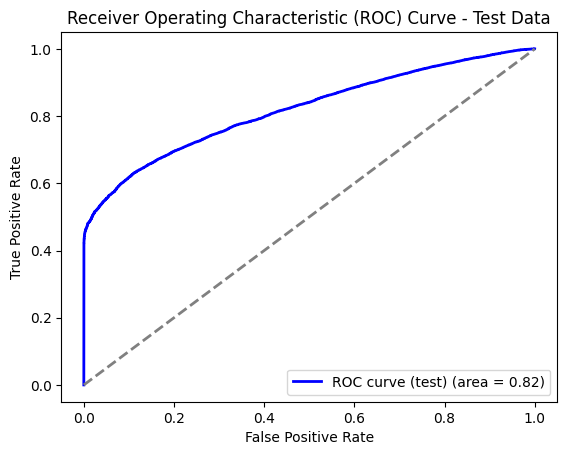

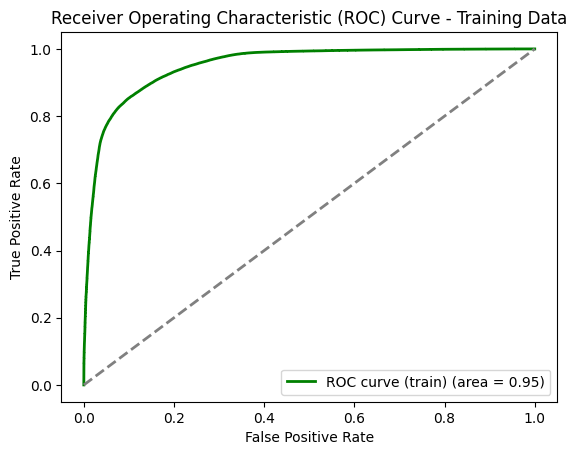

In [41]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Define the simplified XGBoost model with custom parameters
base_model = xgb.XGBClassifier(
    max_depth=4,                # Further reduced depth
    learning_rate=0.05,         # Conservative learning rate
    n_estimators=150,           # Reduced number of boosting rounds
    min_child_weight=15,        # Increased for stronger regularization
    reg_alpha=0.3,              # Further increased L1 regularization
    reg_lambda=3.0,             # Further increased L2 regularization
    subsample=0.7,              # Lower subsample to reduce variance
    colsample_bytree=0.7,       # Lower feature subsampling
    scale_pos_weight=scale_pos_weight * 1.5,  # Adjusted focus on Class 0
    random_state=42,
    use_label_encoder=False,
    n_jobs=-1
)

# Define the Bagging model
model = BaggingClassifier(
    estimator=base_model,
    n_estimators=50,            # Reduce Bagging iterations to control variance
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)


# Fit the final model on the entire training data
model.fit(X_train, y_train)

# Make predictions on test and training data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

# Calculate confusion matrix for test data and compute class-specific accuracy
conf_matrix_test = confusion_matrix(y_test, y_pred)
class_0_accuracy_test = conf_matrix_test[0, 0] / conf_matrix_test[0].sum()
class_1_accuracy_test = conf_matrix_test[1, 1] / conf_matrix_test[1].sum()

# Calculate confusion matrix for training data and compute class-specific accuracy
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_0_accuracy_train = conf_matrix_train[0, 0] / conf_matrix_train[0].sum()
class_1_accuracy_train = conf_matrix_train[1, 1] / conf_matrix_train[1].sum()

# Print evaluation metrics for test and training data
print(f"Test Accuracy: {accuracy}")
print(f"Test Log Loss: {log_loss_value}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test Classification Report:\n{report}")
print(f"Class 0 Test Accuracy: {class_0_accuracy_test}")
print(f"Class 1 Test Accuracy: {class_1_accuracy_test}")

print(f"Train Accuracy: {train_accuracy}")
print(f"Train Log Loss: {train_log_loss}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Classification Report:\n{train_report}")
print(f"Class 0 Train Accuracy: {class_0_accuracy_train}")
print(f"Class 1 Train Accuracy: {class_1_accuracy_train}")

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve (train) (area = {train_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()